In [ ]:
!pip install qiskit
!pip install pylatexenc

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
import math
import numpy as np

## Задача 1. Генерация суперпозиций.

Дано N кубитов ($1 \le N \le 8$) в нулевом состоянии |0..0>. Также дана некоторая последовательность битов, которое задает ненулевое базисное состояние размера N. Задача получить суперпозицию нулевого состояния и заданного.
$$|S> = \frac{1}{\sqrt2}(|0..0> + |\psi>)$$
Первый элемент массива $\psi$ равен 1. 

In [ ]:
N = np.random.randint(5, 8)
print('N = ', N)
q = QuantumRegister(N, name='qs')   
bits = []
bits.append(1)
for i in range(1, N):
    bits.append(np.random.choice([0, 1]))

print('psi = ', bits)

N =  7
psi =  [1, 1, 1, 1, 0, 0, 1]


In [ ]:
def Solve1(qs, psi):
    global circuit
    # применяем оператор Адамара для первого кубита
    circuit.h(0) 
    circuit.barrier()
    # для всех единичных кубитов применяем оператор CNOT с первым
    for i in range (1, len(psi)):
        if psi[i] == 1: circuit.cx(qs[0], qs[i])

circuit = QuantumCircuit(q)
Solve1(q, bits)

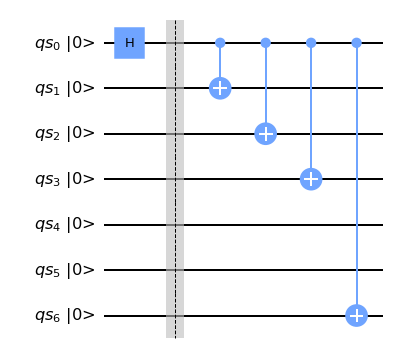

In [ ]:
circuit.draw(output='mpl', initial_state=True)

In [ ]:
circuit.draw(output='latex_source',initial_state=True)

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{qs}_{0} : \\ket{{0}} } & \\lstick{{qs}_{0} : \\ket{{0}} } & \\gate{\\mathrm{H}} \\barrier[0em]{6} & \\qw & \\ctrl{1} & \\ctrl{2} & \\ctrl{3} & \\ctrl{6} & \\qw & \\qw\\\\\n\t \t\\nghost{{qs}_{1} : \\ket{{0}} } & \\lstick{{qs}_{1} : \\ket{{0}} } & \\qw & \\qw & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{qs}_{2} : \\ket{{0}} } & \\lstick{{qs}_{2} : \\ket{{0}} } & \\qw & \\qw & \\qw & \\targ & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{qs}_{3} : \\ket{{0}} } & \\lstick{{qs}_{3} : \\ket{{0}} } & \\qw & \\qw & \\qw & \\qw & \\targ & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{qs}_{4} : \\ket{{0}} } & \\lstick{{qs}_{4} : \\ket{{0}} } & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{qs}_{5} : \\ket{{0}} } & \\lstick{{qs}_{5} : \\ket{{0}} } & \\qw & \\qw 

## Задача 2. Различение состояний 1

In [ ]:
N = np.random.randint(1, 8)
print('N = ', N)

GHZ = [1/math.sqrt(2)]
for i in range (1, 2**N-1):
    GHZ.append(0)
GHZ.append(1/math.sqrt(2))

GHZ = Statevector(GHZ)
GHZ.draw('latex')

N =  4


<IPython.core.display.Latex object>

In [ ]:
np.log2(10) % 1

0.3219280948873622

In [ ]:
W = [0]
for i in range (1, 2**N):
    if np.log2(i) % 1:
        W.append(0)
    else:
        W.append(1/math.sqrt(N))
W = Statevector(W)
W.draw('latex')

<IPython.core.display.Latex object>

* Первое состояние: при измерении все кубиты равны 0 или 1.
* Второе состояние: при измерении только один кубит равен 1, остальные равны 0

При N = 1 различить состояния невозможно (в этом случае - |W>)

In [ ]:
def Solve2(q):
    msr = q.measure()[0]
    one_count = 0
    for q in msr:
        if q == '1': one_count += 1
    if one_count == 1:
        return 'W'
    else:
        return 'GHZ'

Solve2(GHZ)

'GHZ'

## Задача 2. Различение состояний 2

In [ ]:
S0 = Statevector([1/2, 1/2, 1/2, 1/2])
S1 = Statevector([1/2, -1/2, 1/2, -1/2])
S2 = Statevector([1/2, 1/2, -1/2, -1/2])
S3 = Statevector([1/2, -1/2, -1/2, 1/2])

In [ ]:
S0.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
S1.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
S2.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
S3.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
def Solve3(q):
    global circuit
    circuit.initialize(q)
    circuit.h(0)
    circuit.h(1)

    state = Statevector(circuit)
    msr = state.measure()[0]
    if msr == '00':
        return 0
    elif msr == '01':
        return 1
    elif msr == '10':
        return 2
    elif msr == '11':
        return 3

circuit = QuantumCircuit(2)
print(Solve3(S3))

3
